In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
jokes = pd.read_csv('jokes.csv')

In [27]:
jokes.iloc[11]

joke_id                                                     12
joke_text    A duck walks into a pharmacy and asks for a co...
Name: 11, dtype: object

In [4]:
jokes['joke_text'].iloc[12]

"Q: What is the Australian word for a boomerang that won't come back? A: A stick."

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.head()

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115


In [26]:
train['user_id'].value_counts()

367      93
366      93
233      93
337      93
179      93
         ..
37336     7
37005     7
18758     7
16124     7
19581     7
Name: user_id, Length: 40863, dtype: int64

In [9]:
joke = jokes.merge(train,on= 'joke_id')

In [10]:
train['joke_id'].value_counts()

6      27498
8      27485
5      27402
3      27369
4      27368
       ...  
70       113
41       112
42       109
106      104
90       100
Name: joke_id, Length: 139, dtype: int64

In [11]:
joke.head()

,joke_id,joke_text,id,user_id,Rating
0,1,Q. What's O. J. Simpson's web address? A. Slas...,41_1,41,3.062
1,1,Q. What's O. J. Simpson's web address? A. Slas...,282_1,282,1.062
2,1,Q. What's O. J. Simpson's web address? A. Slas...,117_1,117,-8.469
3,1,Q. What's O. J. Simpson's web address? A. Slas...,259_1,259,2.688
4,1,Q. What's O. J. Simpson's web address? A. Slas...,167_1,167,8.125


In [12]:
joke['joke_length'] = joke['joke_text'].apply(lambda x : len(x))

In [14]:
joke_rating = joke.groupby('joke_id').mean()

In [25]:
joke_rating.tail()

,user_id,Rating,joke_length
joke_id,,,
135,20038.335178,2.436230,406.0
136,19368.845079,0.151546,311.0
137,20532.239890,1.845306,592.0
138,21855.268288,3.038180,795.0
139,20655.281732,2.410134,187.0


In [24]:
test[test['joke_id'] == 139]

,id,user_id,joke_id
45,18921_139,18921,139
270,31241_139,31241,139
283,1265_139,1265,139
295,20074_139,20074,139
349,20546_139,20546,139
...,...,...,...
536745,17802_139,17802,139
536876,38793_139,38793,139
537026,20346_139,20346,139
537119,27571_139,27571,139


In [37]:
train[(train['joke_id'] == 139) & (train['id'] == '18921_139')]

,id,user_id,joke_id,Rating


In [30]:
sb.set_style('whitegrid')

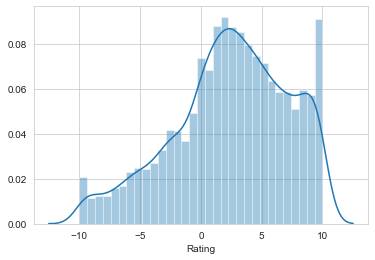

In [31]:
sb.distplot(train[train['joke_id'] == 139]['Rating'])

In [40]:
test[(test['joke_id'] == 139) & (test['id'] == '18921_139')]

,id,user_id,joke_id
45,18921_139,18921,139


In [41]:
train['user_id'].value_counts()

367      93
366      93
233      93
337      93
179      93
         ..
37336     7
37005     7
18758     7
16124     7
19581     7
Name: user_id, Length: 40863, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = train.drop(['id', 'user_id', 'Rating'], 1).values
y = train['Rating'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid=
                   {'n_estimators': [100,200,300,400,500]}, verbose= 1)

In [ ]:
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [14]:
rfr = RandomForestRegressor()

In [15]:
rfr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [17]:
r_pred = rfr.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
print(mean_absolute_error(r_pred, y_test))

4.030810995752852


In [20]:
print(mean_squared_error(r_pred, y_test))

24.700197725105685


In [21]:
y_test

array([-0.438, -1.75 , -9.031, ..., -6.156,  1.531,  3.25 ])

In [22]:
r_pred

array([-2.3657835 ,  2.78018135,  3.00899026, ...,  3.06576631,
       -1.40093384,  3.70649112])

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rff = RandomForestRegressor()

In [25]:
X_train = train.drop(['id', 'user_'])

Index(['id', 'user_id', 'joke_id', 'Rating'], dtype='object')